In [81]:
from sklearn.datasets import make_regression
import numpy as np

In [82]:
X,y  = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=12)

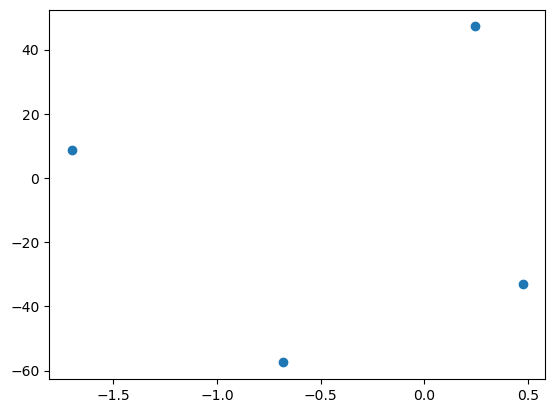

In [83]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [85]:
lr.coef_

array([1.9727935])

In [86]:
lr.intercept_

-7.816786196244996

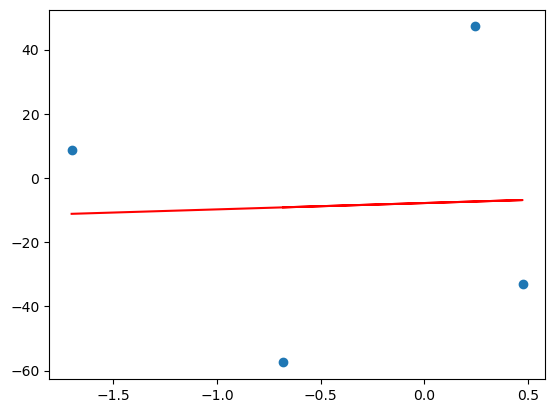

In [87]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color = 'red')

###  slope calculations with respect to b as we are optimizing b in this specific example
$
loss function  = \left( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \right)
$

#### by differentiating loss function we calculate slope and this given loss function is dependant on the algorithm we are using.
$
l(b) = \left( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \right)
$

$
\frac{dL}{db} = \frac{d}{db} \left( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \right)
$

$
\frac{d}{db} \sum_{i=1}^{n} \left( y_i - mx_i - b \right)^2
$

$
2 \sum_{i=1}^{n} \left( y_i - mx_i - b \right)
$

$
-2 \sum_{i=1}^{n} \left( y_i - 1.972793 \cdot x_i - 0 \right)
$







In [88]:
# Gradient Descent assuming slope is constant m = 1.9727935 and assume the starting value for intercept b= 0

y_pred = ((1.972793 * X) + 0 ).reshape(4)

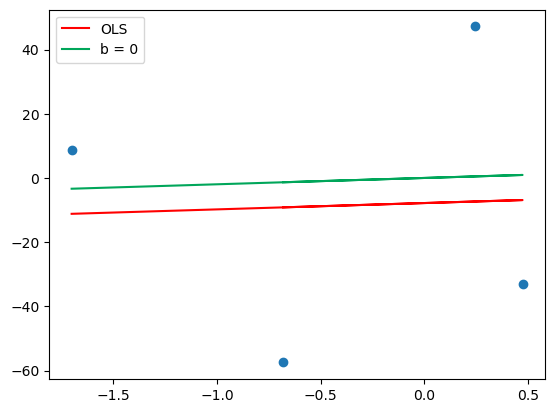

In [89]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.legend()
plt.show()

In [90]:
m = 1.972793
b = 0

loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope

62.53429124820666

In [91]:
#  lets take learning rate as 0.1

learning_rate = 0.1
step_size = loss_slope*learning_rate
step_size

6.253429124820666

In [92]:
#  calculate the new intercept

b = b - step_size
b

-6.253429124820666

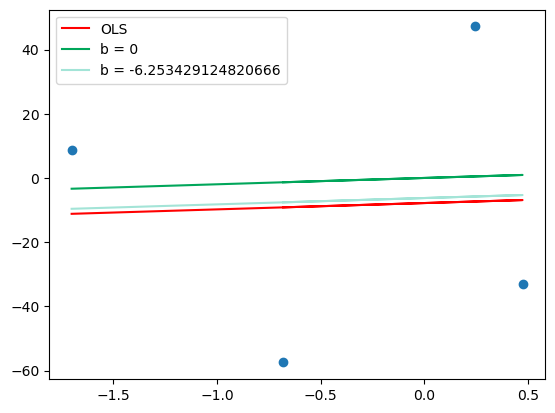

In [93]:
y_pred1 = ((1.972793 * X) + b ).reshape(4)
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.plot(X,y_pred1, color='#A3E4D7', label='b = {}'.format(b))
plt.legend()
plt.show()


In [94]:
# iteration 2

loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope

12.506858249641311

In [95]:
step_size = loss_slope*learning_rate
step_size

1.2506858249641313

In [96]:
b = b - step_size
b

-7.504114949784798

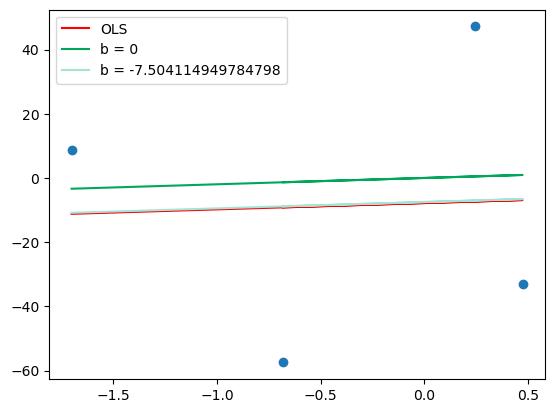

In [97]:
y_pred1 = ((1.972793 * X) + b ).reshape(4)
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.plot(X,y_pred1, color='#A3E4D7', label='b = {}'.format(b))
plt.legend()
plt.show()

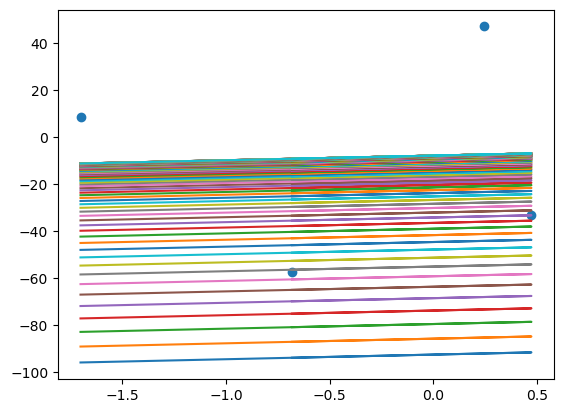

In [98]:
b = -100
m = 1.972793
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)